# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [4]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [17]:
training_history = cnn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=10,
    steps_per_epoch=200,            # Limit the number of steps per epoch
    validation_steps=50             # You can also limit validation steps if needed
)


Epoch 1/10


200/200 [==============================] - 197s 967ms/step - loss: 3.3504 - accuracy: 0.0964 - val_loss: 2.7165 - val_accuracy: 0.2025
Epoch 2/10
200/200 [==============================] - 198s 989ms/step - loss: 2.3121 - accuracy: 0.3419 - val_loss: 1.7922 - val_accuracy: 0.4781
Epoch 3/10
200/200 [==============================] - 232s 1s/step - loss: 1.6921 - accuracy: 0.5038 - val_loss: 1.1724 - val_accuracy: 0.6288
Epoch 4/10
200/200 [==============================] - 289s 1s/step - loss: 1.4334 - accuracy: 0.5733 - val_loss: 1.0799 - val_accuracy: 0.6712
Epoch 5/10
200/200 [==============================] - 387s 2s/step - loss: 1.1838 - accuracy: 0.6408 - val_loss: 1.0663 - val_accuracy: 0.6769
Epoch 6/10
200/200 [==============================] - 438s 2s/step - loss: 1.0263 - accuracy: 0.6892 - val_loss: 0.8671 - val_accuracy: 0.7244
Epoch 7/10
200/200 [==============================] - 317s 2s/step - loss: 0.9066 - accuracy: 0.7244 - val_loss: 0.6546 - val_accuracy

## Evaluating Model

In [19]:
# Limiting training set to 200 samples
reduced_training_set = training_set.take(200)

# Evaluating the reduced training set
train_loss, train_acc = cnn.evaluate(reduced_training_set)
print('Training accuracy:', train_acc)


200/200 [==============================] - 61s 304ms/step - loss: 0.6276 - accuracy: 0.8050
Training accuracy: 0.8050000071525574


In [20]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 169s 307ms/step - loss: 0.6157 - accuracy: 0.8070
Validation accuracy: 0.8070225119590759


### Saving Model

In [21]:
cnn.save('trained_plant_disease_model.keras')

In [22]:
training_history.history #Return Dictionary of history

{'loss': [3.3503661155700684,
  2.3121438026428223,
  1.6920791864395142,
  1.4334206581115723,
  1.1837562322616577,
  1.026296854019165,
  0.9065611958503723,
  0.8097278475761414,
  0.7388298511505127,
  0.7040214538574219],
 'accuracy': [0.0964062511920929,
  0.34187498688697815,
  0.5037500262260437,
  0.5732812285423279,
  0.6407812237739563,
  0.6892187595367432,
  0.7243750095367432,
  0.7509375214576721,
  0.765625,
  0.7817187309265137],
 'val_loss': [2.716548442840576,
  1.7922253608703613,
  1.1724345684051514,
  1.0799044370651245,
  1.0662598609924316,
  0.8671025037765503,
  0.654632568359375,
  0.6470361351966858,
  0.5900492072105408,
  0.5962786078453064],
 'val_accuracy': [0.20250000059604645,
  0.4781250059604645,
  0.6287500262260437,
  0.6712499856948853,
  0.6768749952316284,
  0.7243750095367432,
  0.8037499785423279,
  0.7956249713897705,
  0.8056250214576721,
  0.8081250190734863]}

In [23]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [24]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

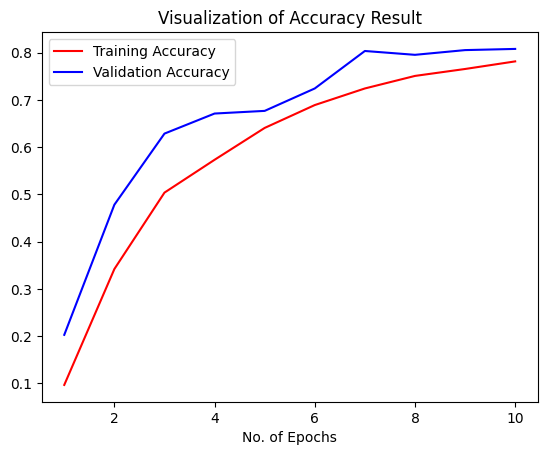

In [25]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [26]:
class_name = validation_set.class_names

In [27]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [28]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 267s 15ms/step


In [29]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [30]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [31]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  3,  0, ..., 37, 37, 37], dtype=int64)>

In [32]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [33]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.89      0.55      0.68       504
                                 Apple___Black_rot       0.87      0.79      0.82       497
                          Apple___Cedar_apple_rust       0.94      0.73      0.82       440
                                   Apple___healthy       0.71      0.82      0.76       502
                               Blueberry___healthy       0.53      0.97      0.68       454
          Cherry_(including_sour)___Powdery_mildew       0.88      0.76      0.82       421
                 Cherry_(including_sour)___healthy       0.98      0.73      0.84       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.88      0.76      0.82       410
                       Corn_(maize)___Common_rust_       0.96      0.96      0.96       477
               Corn_(maize)___Northern_Leaf_Blight       0.85      0.91      0.

### Confusion Matrix Visualization

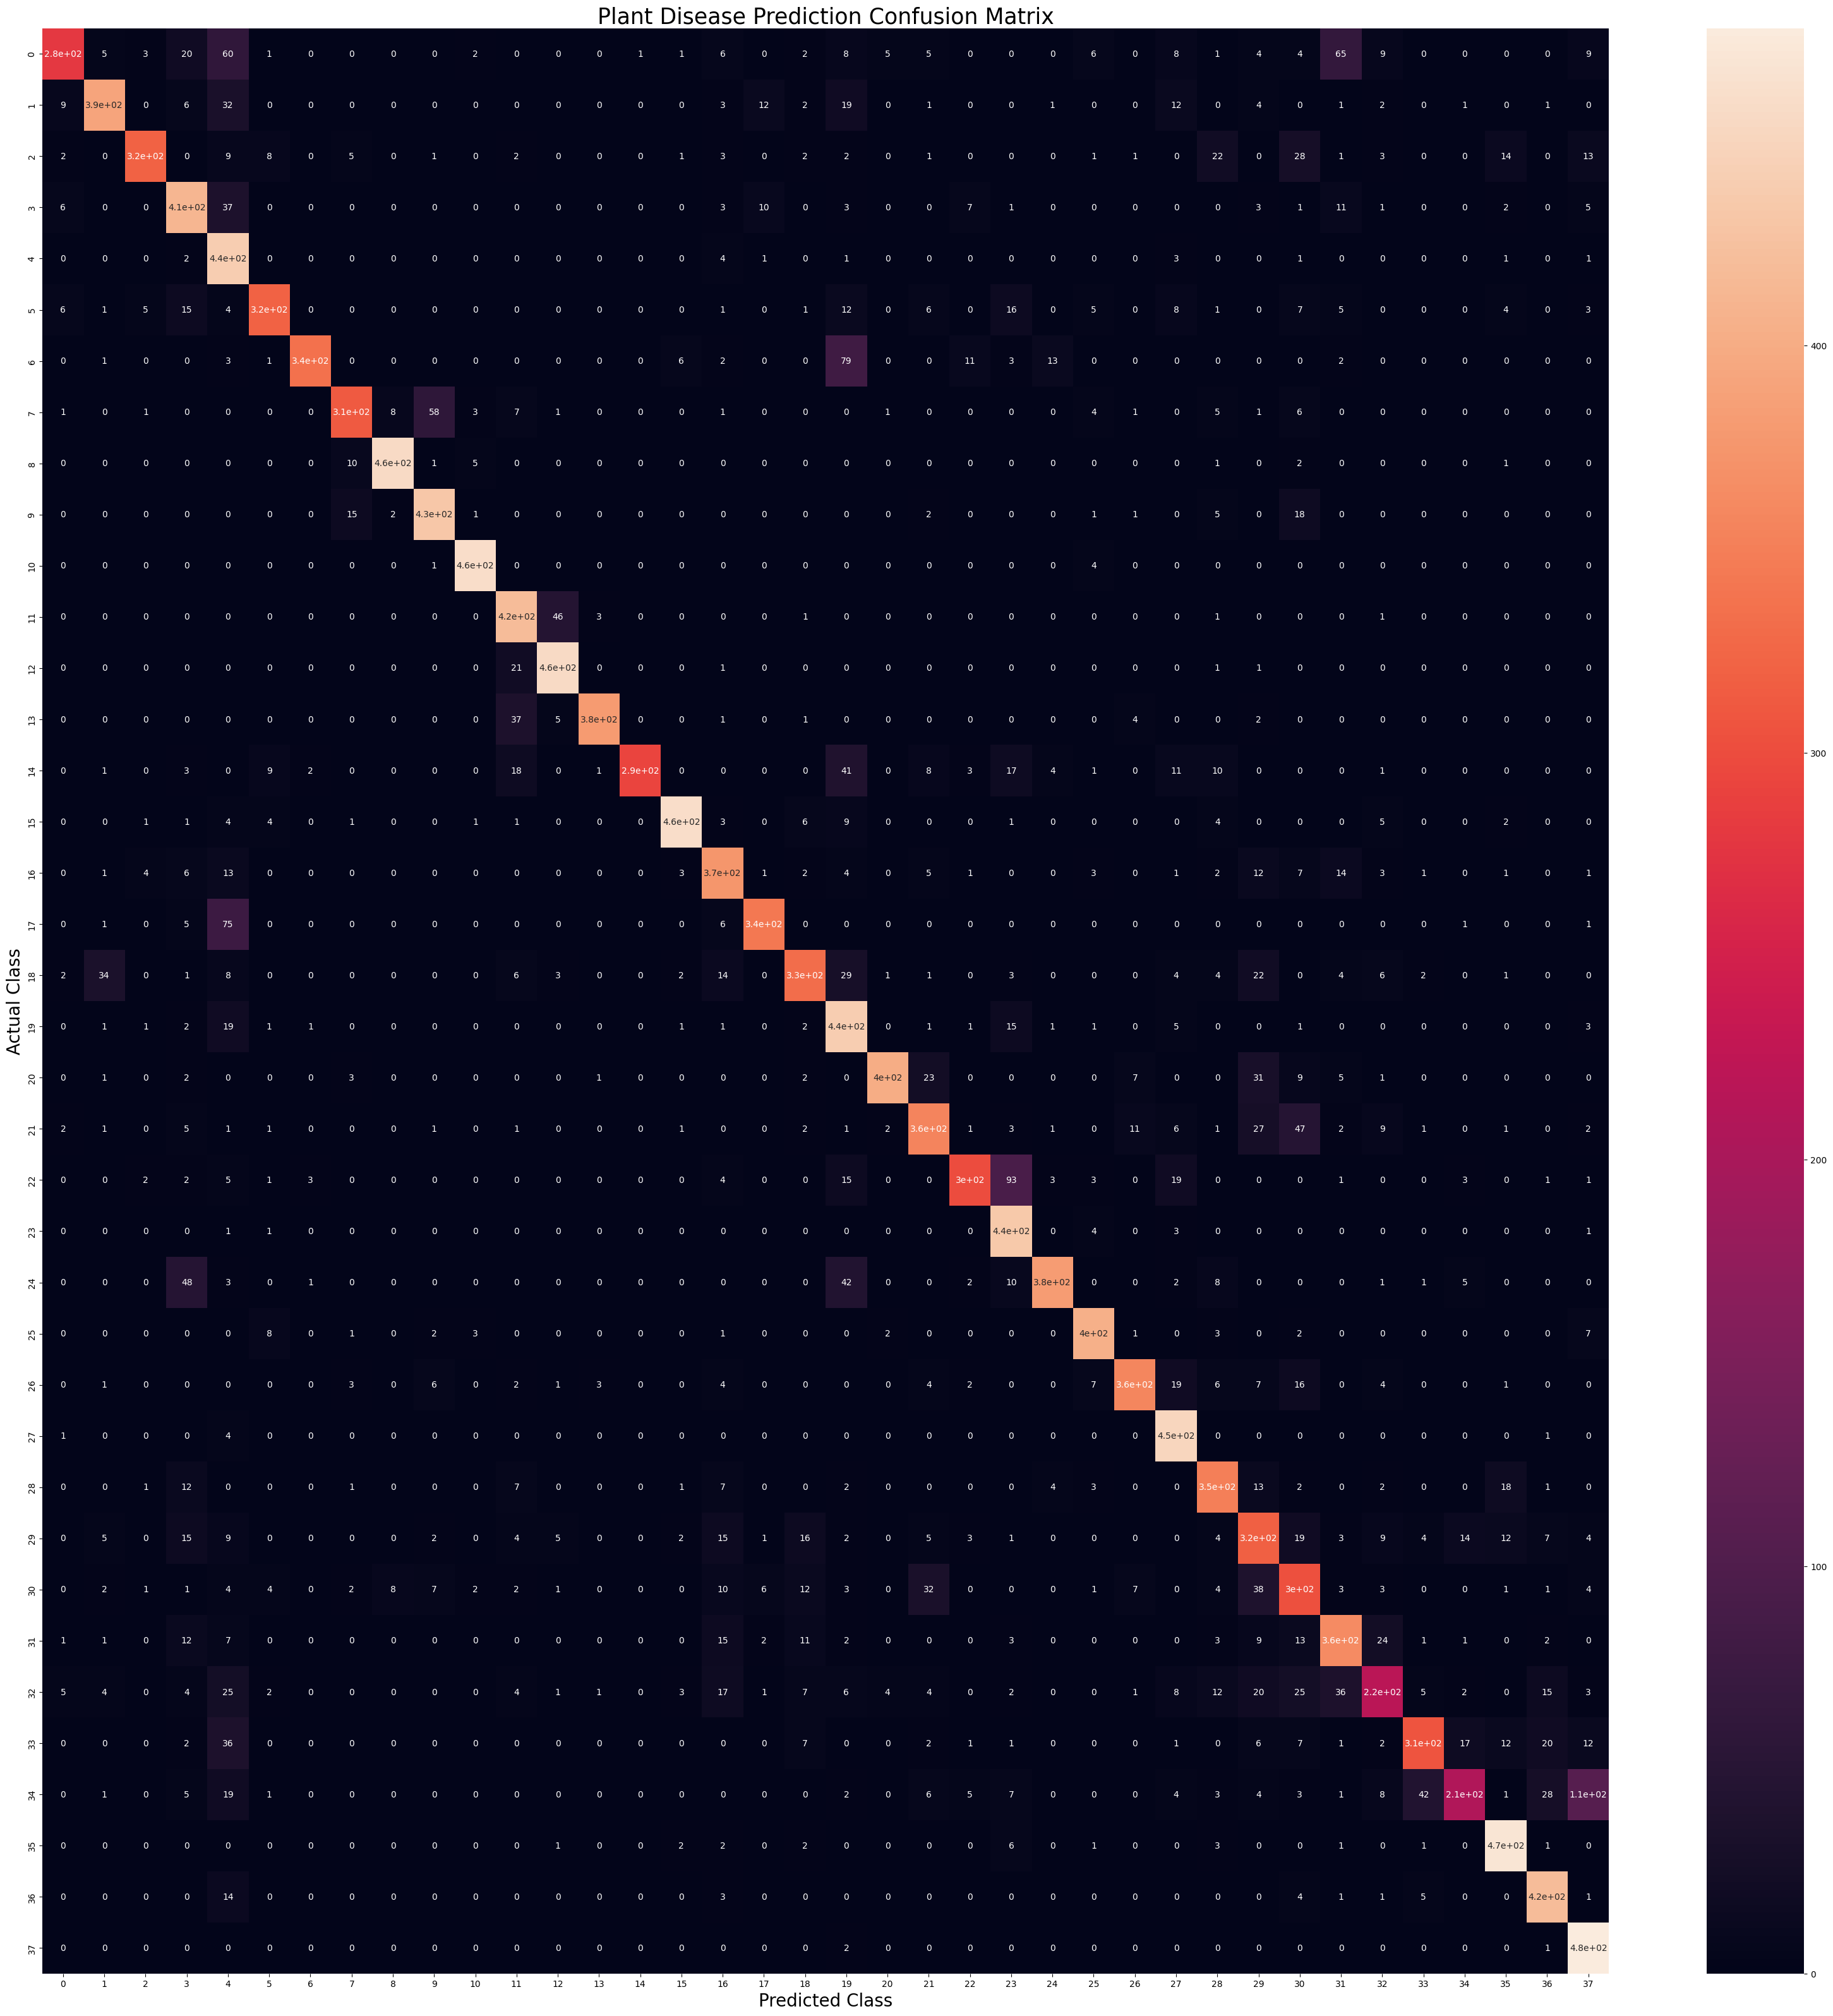

In [34]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()